<a href="https://colab.research.google.com/github/davidfague/Stylized-ReducedOrder-L5-Model/blob/main/HOC_Detailed_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Colab: Upload simdata folder to Stylized-Cell-model folder before running

cd for google drive

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd /content/drive/MyDrive/Stylized-Cell-model/

/content/drive/MyDrive/Stylized-Cell-model


cd for server

In [29]:
# cd Hay&Segev2015
# source /opt/python-bmtk//bin/activate
# cd simdata/L5PCbiophys3/N1_c0_cond0_seed50
# cd 

In [30]:
%ls

 active_channel_model_example.ipynb       HOCDetailed_spikes.h5
 active_channel_model_groundtruth.ipynb   HOCDetailed_v_report.h5
 ca_df.csv                                i_CaHva_report.hdf5
 Ca_HVA.ica_report.h5                     i_CaLva_report.hdf5
 Ca_LVAst.ica_report.h5                   ihcn_report.hdf5
 Connections.csv                          Ih.ihcn_report.h5
 data.h5                                  inmda_report.h5
 Detailed_Ca_HVA.ica_report.h5            i_nmda_report.hdf5
 Detailed_Ca_LVAst.ica_report.h5         'L5 Individual Basal Paths'/
 Detailed_Ih.ihcn_report.h5              'L5 Individual Oblique Paths'/
 Detailed_inmda_report.h5                'L5 Individual Tuft Paths'/
 Detailed_NaTa_t.gNaTa_t_report.h5        L5Morphology.swc
 Detailed_Segments.csv                    L5Morphology.swc.txt
 Detailed_spikes.h5                       L5Segments.csv
 Detailed_v_report.h5                     mechanisms/
 Elec_distance.svg                        na_df.csv
 example_mod

In [31]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import math
import os
from pathlib import Path
import h5py
import csv

#X Coords
##extract X coordinates from txt file

In [32]:
def getsegtracefromtxt(filename):
  #imports data
  data = np.genfromtxt(filename,delimiter=',')
  #drops the nan
  data1 = (data[:, ~np.isnan(data).any(axis=0)])
  #check to make sure its gone
  return data1

def createsegtracereport(reportname,dataname):
  try:
    os.remove(reportname) # reportname was string " "
  except:
    x = 1

  f = h5py.File(reportname,'w') #create a file in the w (write) mode #reportname was string ' '
  v = f.create_dataset("report/biophysical/data", data = dataname)
  f.close()

def getsegparamfromtxt(filename):
  temp = np.array(0)

  # read in csv
  with open(filename, newline='') as csvfile:
      data = csv.reader(csvfile, delimiter=',')
      for row in data:
          temp = np.append(temp,row)
  #remove 0
  temp = np.delete(temp,0)

  #removes extra values due to comma at the end
  new_arr = np.delete(temp, np.where(temp == ''))

  # makes into ints to make h5py happy
  data1 = np.array(new_arr).astype(float)
  return data1

In [33]:
inmda_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/inmdaSegTracesN0.txt')
gNaTa_t_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/gNaTa_tSegTracesN0.txt')
ica_HVA_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/ica_HVASegTracesN0.txt')
ica_LVAst_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/ica_LVASegTracesN0.txt')
Ih_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/IhTraceforEachSegmentN0.txt')
volt_data = getsegtracefromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/voltageSegTracesN0.txt')
#print(inmda_data)
spikes = getsegparamfromtxt('simdata//L5PCbiophys3/N1_c0_cond0_seed427/spikeTimesN0.txt')


In [34]:
ih_data = Ih_data
gNaTa_T_data = gNaTa_t_data
icah_data = ica_HVA_data
ical_data = ica_LVAst_data
v_dend = volt_data

In [35]:
nseg=642
segID = list(range(nseg))
#print(segID)

AllSegXCoord = getsegparamfromtxt('simdata//L5PCbiophys3/N1_c0_cond0_seed427/AllSegXCoordValuesN0.txt')
AllSegYCoord = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegYCoordValuesN0.txt')
AllSegZCoord = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegZCoordValuesN0.txt')
AllSegElecDist = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegElecDistValuesN0.txt')

#synapse conductance
gmax_list = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/synConductanceN0.txt')
print(gmax_list)


DSynSecType = getsegparamfromtxt('simdata//L5PCbiophys3/N1_c0_cond0_seed427/SynSecTypeN0.txt') # convert DSynSecType #convert segtype from 0 to soma, 1 to basal, 2 to apical, 3 to axonal
SynX = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/SynXN0.txt')
SynParentSeg = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/SynSegIDN0.txt')
SynDist = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/SynDistanceN0.txt')
DSynType = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/SynTypeN0.txt') #convert 0 to inh 1 to exc

AllSegDist = getsegparamfromtxt('simdata//L5PCbiophys3/N1_c0_cond0_seed427/SegDistanceN0.txt') 
DAllSegType = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegTypeN0.txt')
AllSegSection = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/SegSecIDN0.txt')
SegX = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/AllSegXN0.txt')
#print("SimParam is: ", SimParam)

[0.0004 0.0004 0.0004 ... 0.001  0.001  0.001 ]


In [36]:
#SimParam = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/simParam.txt') # try to pull sim param this way # the values get rounded to integer #

In [37]:
synapse_sec_list = getsegparamfromtxt('simdata/L5PCbiophys3/N1_c0_cond0_seed427/SynSecIDN0.txt')

In [38]:
SynType = ['soma' if y==0 else 'basal' if y==1 else 'apic' if y==2 else 'axon' #assign randomly, adhere to proportion 
                                          for y in DSynSecType]

print(DSynSecType)
print(SynType)

[1. 0. 0. ... 0. 1. 0.]
['basal', 'soma', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'basal', 'soma', 'basal', 'soma', 'soma', 'soma', 'basal', 'basal', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'basal', 'soma', 'soma', 'soma', 'basal', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'basal', 'soma', 'basal', 'soma', 'soma', 'basal', 'basal', 'basal', 'soma', 'basal', 'basal', 'soma', 'basal', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'soma', 'soma', 'soma', 'soma', 'basal', 'soma', 'soma', 'soma', 'soma', 'soma', 'basal', 'soma', 'basal', 'soma', 'soma', 'soma', 'soma', 'basal', 'basal', 'basal', 'basal', 'basal', 'basal', 'soma', 'basal', 'soma', 'soma', 'soma', 'basal', 'basal', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'soma', 'som

In [39]:
SourcePop = ['dist_inh_stim' if y==0 else 'exc_stim'
                                          for y in DSynType]
print(DSynType)
print(SourcePop)

[1. 1. 1. ... 0. 0. 0.]
['exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'dist_inh_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_sti

In [40]:
print(SynType)

['basal', 'soma', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'basal', 'soma', 'soma', 'basal', 'soma', 'basal', 'soma', 'basal', 'soma', 'soma', 'soma', 'basal', 'basal', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'basal', 'soma', 'soma', 'soma', 'basal', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'basal', 'basal', 'soma', 'basal', 'soma', 'soma', 'basal', 'basal', 'basal', 'soma', 'basal', 'basal', 'soma', 'basal', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'soma', 'soma', 'soma', 'soma', 'basal', 'soma', 'soma', 'soma', 'soma', 'soma', 'basal', 'soma', 'basal', 'soma', 'soma', 'soma', 'soma', 'basal', 'basal', 'basal', 'basal', 'basal', 'basal', 'soma', 'basal', 'soma', 'soma', 'soma', 'basal', 'basal', 'soma', 'basal', 'basal', 'basal', 'soma', 'soma', 'basal', 'soma', 'soma', 'soma', 'soma', 'soma', 'basal', 'so

In [41]:
print(len(DAllSegType))

1282


In [42]:
AllSegType=[]
AllSegType.append('soma')
skipcount=0

for i in range(len(DAllSegType)):
  if DAllSegType[i]==1:
    AllSegType.append('dend')
  elif DAllSegType[i]==2:
    AllSegType.append('apic')
  else:
      skipcount+=1
      
AllSegType.append('axon')
AllSegType.append('axon')
# AllSegType = ['soma' if y==0 else 'basal' if y==1 else 'apic' if y==2 else 'axon' #assign randomly, adhere to proportion 
#                                           for y in DAllSegType] 
print("skipcount is: ",skipcount)
print(len(AllSegType))

skipcount is:  643
642


In [43]:
print(DSynType)
print(SourcePop)

[1. 1. 1. ... 0. 0. 0.]
['exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'dist_inh_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'dist_inh_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_stim', 'exc_sti

In [44]:
#creating lists outside of HOC for ease of use
P_0_list = []
for i in range(len(SynX)): # convert to for in syntype array #Convert syntype list: from 0 to inh; from 1 to exc
  P_0_list.append(1)
  # if i > 9999:
  #   SourcePop.append('dist_inh_stim')
  # else:
  #      SourcePop.append('exc_stim')

print(len(P_0_list))
print(len(gmax_list))

12500
12500


In [45]:
AllSegSecName = []
for n in range(nseg):
      AllSegSecName.append('TTC[0].'+ str(AllSegType[n]) + '[' + str(AllSegSection[n]) + ']') #change L5PCtemplate[0]

In [46]:
NsynE=10000
NsynI = 2500
SynName = []

for i in range(NsynE+NsynI):

  SynName.append('L5PCtemplate[0].'+ str(SynType[i]) +'[' + str(synapse_sec_list[i]) + '](' + str(SynX[i]) + ')')

In [47]:
#Name

In [48]:
# MAKE SURE TO CHECK LENGTH OF SEGMENT SectionID's against another segment property (should be 642 segments)

In [49]:
#convert segtype from 0 to soma, 1 to basal, 2 to apical, 3 to axonal

In [50]:
print(len(AllSegType))

642


In [51]:
#Segments.csv

try:
  os.remove("HOCL5DetailedSegments.csv")
except:
  x = 1

# BMTK ID: segment ID
# X: Normalized distance of segment along parent section 
# Type: apic, basal, soma 
# Sec ID: section ID of segment's parent section
# Distance: path distance of segment from soma
# Coord X/Y/Z: 3D coordinates 
# Elec_distance: Elcectrotonic distance

#segments_data = {'BMTK ID':[segID],'X':[SegX],'Type':[AllSegType],'Sec ID':[AllSegSection],'Distance':[AllSegDist],'Coord X':[AllSegXCoord],'Coord Y':[AllSegYCoord],'Coord Z':[AllSegZCoord],'Elec_distance':[AllSegElecDist]}
#segments = pd.DataFrame(segments_data, columns = ['BMTK ID','X','Type','Sec ID','Distance','Coord X','Coord Y','Coord Z','Elec_distance'])


segments = pd.DataFrame({'BMTK ID':segID,'X':SegX,'Type':AllSegType,'Sec ID':AllSegSection,'Distance':AllSegDist,'Coord X':AllSegXCoord,'Coord Y':AllSegYCoord,'Coord Z':AllSegZCoord,'Elec_distance':AllSegElecDist})

segments.to_csv('HOCL5DetailedSegments.csv', index = False)

In [52]:
Degrees = [0] * (nseg)

In [53]:
#SegmentsDegrees

try:
  os.remove("HOCDetailedSegmentsDegrees.csv")
except:
  x = 1

#segmentsDegrees_data = {'SectionName':[AllSegSecName],'BMTK ID':[segID],'X':[SegX],'Type':[AllSegType],'Sec ID':[AllSegSection],'Distance':[AllSegDist],'Coord X':[AllSegXCoord],'Coord Y':[AllSegYCoord],'Coord Z':[AllSegZCoord],'Degrees':[Degrees]}
#segmentsDegrees = pd.DataFrame(segmentsDegrees_data, columns = ['SectionName','BMTK ID','X','Type','Sec ID','Distance','Coord X','Coord Y','Coord Z','Degrees'])

# print(len(AllSegSecName))
# print(len(segID))
# print(len(SegX))
# print(len(AllSegType))
# print(len(AllSegDist))
# print(len(AllSegXCoord))
# print(len(AllSegYCoord))
# print(len(AllSegZCoord))
# print(len(Degrees))


segmentsDegrees = pd.DataFrame({'SectionName': AllSegSecName,'BMTK ID': segID ,'X': SegX ,'Type': AllSegType ,'Sec ID': AllSegSection ,'Distance': AllSegDist ,'Coord X': AllSegXCoord ,'Coord Y': AllSegYCoord,'Coord Z': AllSegZCoord,'Degrees': Degrees})

segmentsDegrees.to_csv('HOCDetailedSegmentsDegrees.csv', index = False)

In [54]:
%cd output_control/

/content/drive/MyDrive/Stylized-Cell-model/output_control


In [55]:
#Connections.csv


try:
  os.remove("HOCDetailedConnections.csv")
except:
  x = 1

# Node ID: Segment ID of synapse's parent segment
# Distance: Path distance from soma (using same dist as parent segment)
# Conductance: G_max of syn
# Type: apic, basal, soma
# Name: L5PCtemplate[0].(Type)[(Sec ID)]((Normalized distance along section))
# Source Population: exititory or inhibitory
# Release Probability: Release porbablity at time 0 

# connections_data = {'Node ID':[SynParentSeg],'Distance':[SynDist],'Conductance':[gmax_list],'Type':[SynType],'Name':[SynName],'Source Population':[SourcePop],'Release Probability':[P_0_list]}

# # Create the pandas DataFrame with column name is provided explicitly
# connections = pd.DataFrame(connections_data , columns=['Node ID','Distance','Conductance','Type','Name','Source Population','Release Probability'])

connections = pd.DataFrame({'Node ID':SynParentSeg,'Distance':SynDist,'Conductance':gmax_list,'Type':SynType,'Name':SynName,'Source Population':SourcePop,'Release Probability':P_0_list})

connections.to_csv('HOCDetailedConnections.csv', index = False)


In [63]:
createsegtracereport('v_report.h5',volt_data.T)
createsegtracereport('Ca_HVA.ica_report.h5',ica_HVA_data.T)
createsegtracereport('Ca_LVAst.ica_report.h5',ica_LVAst_data.T)
createsegtracereport('Ih.ihcn_report.h5',Ih_data.T)
createsegtracereport('inmda_report.h5',inmda_data.T)
createsegtracereport('NaTa_t.gNaTa_t_report.h5',gNaTa_t_data.T)

try:
  os.remove("spikes.h5")
except:
  x = 1

f = h5py.File('spikes.h5','w') #create a file in the w (write) mode
v = f.create_dataset("spikes/biophysical/timestamps", data = spikes)

f.close()

In [57]:
%cd ..

/content/drive/MyDrive/Stylized-Cell-model


#Try Plotting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


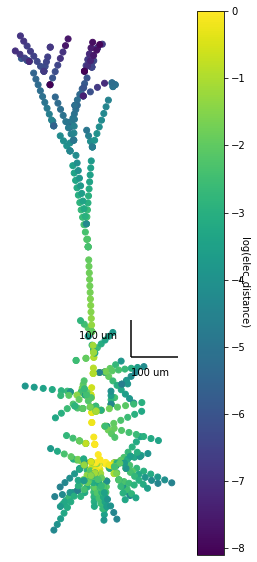

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,10))
ax = plt.scatter(AllSegXCoord, AllSegYCoord, c = np.log(AllSegElecDist) )
plt.vlines(110,300,400)
plt.text(0,350,'100 um')
plt.hlines(300,110,210)
plt.text(110,250,'100 um')
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar()
cbar.ax.set_ylabel('log(elec_distance)', rotation=270)

plt.box(False)
plt.savefig('Elec_distance.svg')

Need to get excitatory syn per seg for the following graph

In [59]:
# plt.figure(figsize=(4,10))
# ax = plt.scatter(DAllSegXCoord, DAllSegYCoord,c = DexcSynPerSeg[0:641],cmap='jet',)
# plt.vlines(110,400,500)
# plt.text(0,450,'100 um')
# plt.hlines(400,110,210)
# plt.text(110,350,'100 um')
# plt.xticks([])
# plt.yticks([])
# cbar = plt.colorbar()
# cbar.ax.set_ylabel('Synapses per segment', rotation=270)

# plt.box(False)
# plt.savefig('exc_syns.svg')

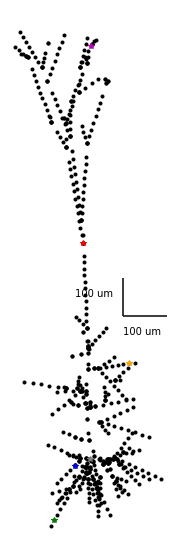

In [60]:
plt.figure(figsize=(3,10))
ax = plt.plot(AllSegXCoord, AllSegYCoord,'.',color='k',markersize=6)
plt.vlines(110,400,500)
plt.text(0,450,'100 um')
plt.hlines(400,110,210)
plt.text(110,350,'100 um')
plt.xticks([])
plt.yticks([])
plt.box(False)

#need to adjust these
soma_probe = 0
nexus_seg = 380
axon_seg = 640
dist_tuft_seg = 552
dist_basal_seg = 221
oblique_seg = 330

plt.plot(AllSegXCoord[soma_probe], 
         AllSegYCoord[soma_probe],
         '*',color='grey')
plt.plot(AllSegXCoord[nexus_seg], 
         AllSegYCoord[nexus_seg],
         'r*')
plt.plot(AllSegXCoord[axon_seg], 
         AllSegYCoord[axon_seg],
         'b*')
plt.plot(AllSegXCoord[dist_tuft_seg], 
         AllSegYCoord[dist_tuft_seg],
         'm*')
plt.plot(AllSegXCoord[dist_basal_seg], 
         AllSegYCoord[dist_basal_seg],
         'g*')
plt.plot(AllSegXCoord[oblique_seg], 
         AllSegYCoord[oblique_seg],
         '*',color='orange')

#plt.savefig('fig1A.svg')

In [61]:
tstop=1500/.25 # timearound*2 / dt 
tstop=tstop-.1

In [62]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),volt_data[soma_probe],color='grey')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Soma Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

NameError: ignored

<Figure size 1080x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[nexus_seg],color='r')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Nexus Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[axon_seg],color='b')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Axon Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[dist_tuft_seg],color='m')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Tuft Dendrite Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[dist_basal_seg],color='g')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Basal Dendrite Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(np.arange(0,((tstop)+.1),.1),Dvolt_data[oblique_seg],color='orange')
plt.hlines(-65,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-40,0,1000, color = 'grey', linestyle = 'dashed')
plt.hlines(-10,50,70)
plt.vlines(50,-10,0)
plt.text(50,-15,'10 ms')
plt.text(2,-5,'10 mV')
plt.text(2,-37,'-40 mV')
plt.text(2,-62,'-65 mV')
plt.title('Oblique Dendrite Voltage')
plt.box(False)
plt.xticks([])
plt.yticks([])

#T undefined
#Vrecord undefined

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline



# # Ca LVA current 

# plt.figure(figsize=(20,14))
# for i in range(Dica_LVAst_data.shape[0]):
#     plt.plot(t,Dica_LVAst_data[i,:])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('ica_LVAst')
#     plt.xlabel('ms')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# # CA HVA current

# plt.figure(figsize=(20,14))
# for i in range(Dica_HVA_data.shape[0]):
#     plt.plot(t,Dica_HVA_data[i,:])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('ica_HVA')
#     plt.xlabel('ms')
#     plt.title('Detailed model iCa_HVA')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# # h current

# plt.figure(figsize=(20,14))
# for i in range(Dih_data.shape[0]):
#     plt.plot(t,Dih_data[i,:])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('Ih')
#     plt.xlabel('ms')
#     plt.title('ih')
# plt.show()

In [ ]:
# sec = []
# for i in range(nseg-1):
#   if AllSegSection[i] >= 11 :
#     sec.append(i)

# print(len(sec))



# plt.figure(figsize=(20,14))
# for i in sec:
#     plt.plot(t,gNaTa_T_data[i,:])
#     plt.title(gNaTa_T, loc='center')
#     plt.ylabel('gNaTa_T')
#     plt.xlabel('ms')
#     plt.title('gNaTa_T')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline


# #NMDA current 

# plt.figure(figsize=(20,14))
# for i in range(len(i_NMDA_bySeg)):
#     plt.plot(t,i_NMDA_bySeg[i])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('i_NMDA')
#     plt.xlabel('ms')
#     plt.title('i_NMDA in every segment')
# plt.show()

In [ ]:



# #NMDA current 

# plt.figure(figsize=(20,14))
# for i in range(len(v_dend)):
#     plt.plot(t,v_dend[i])
#     plt.title(Vrecord[i], loc='center')
#     plt.ylabel('v dend ')
#     plt.xlabel('ms')
#     plt.title('NMDA current')
# plt.show()